In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os , shutil
import cv2
import matplotlib.image as npimg
import seaborn as sns
%matplotlib inline 
plt.style.use('ggplot')

In [2]:
import zipfile
z = zipfile.ZipFile('archive.zip')
z.extractall()

In [3]:
import os

folder = 'brain_tumor_dataset/yes/'
count = 1

for filename in os.listdir(folder):
    source = os.path.join(folder, filename) 
    # Create a destination filename
    destination = os.path.join(folder, f"Y_{count}.jpg")
    
    # Check if the destination file already exists
    while os.path.exists(destination):
        count += 1
        destination =  os.path.join(folder, f"Y_{count}.jpg")
    
    # Rename he file
    os.rename(source, destination)
    count += 1

print("All files are renamed in the yes dir")

All files are renamed in the yes dir


In [4]:
import os

folder = 'brain_tumor_dataset/no/'
count = 1

for filename in os.listdir(folder):
    source = os.path.join(folder, filename)
    
    # Create a destination filename
    destination = os.path.join(folder, f"Y_{count}.jpg")
    
    # Check if the destination file already exists
    while os.path.exists(destination):
        count += 1
        destination =  os.path.join(folder, f"Y_{count}.jpg")
    
    # Rename he file
    os.rename(source, destination)
    count += 1

print("All files are renamed in the no dir")

All files are renamed in the no dir


EDA (Exploratory Data Analysis)

In [14]:
listyes = os.listdir("brain_tumor_dataset/yes/")
number_files_yes =len(listyes)
print(number_files_yes)

155


In [13]:
listno=os.listdir("augmented_data/no/")
number_files_no = len(listno)
print(number_files_no)

587


# plot

Text(0.5, 1.0, 'count of Brain Tumor Image')

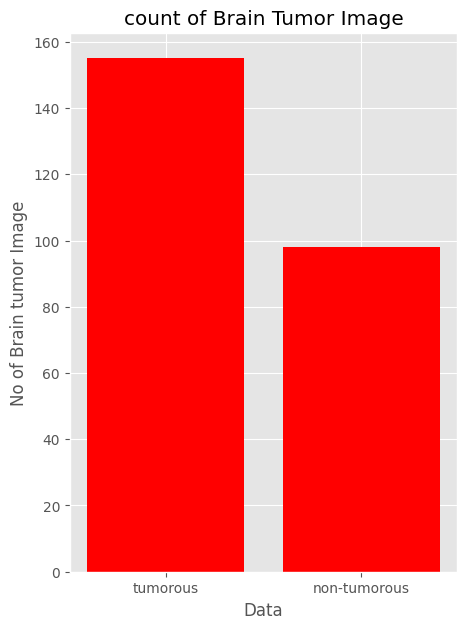

In [8]:
data = {'tumorous' : number_files_yes , 'non-tumorous': number_files_no}
typex = data.keys()
values = data.values()
fig = plt.figure(figsize=(5,7))
plt.bar(typex , values ,color = "red")
plt.xlabel("Data")
plt.ylabel("No of Brain tumor Image")
plt.title("count of Brain Tumor Image")

In [ ]:
# Data Agumentation
# 155(61%) , 98(39%)
# imbalance datasets

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten ,Dense ,Dropout
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import SGD ,Adam
from tensorflow.keras.callbacks import ModelCheckpoint , EarlyStopping ,ReduceLROnPlateau

In [10]:
def timing(sec_elapsed):
    h=int(sec_elapsed /(60*60))
    m=int(sec_elapsed/(60*60)/60)
    s=sec_elapsed % 60
    return f"{h}:{m}:{s}"

In [66]:

def augmented_data(file_dir ,n_generated_samples ,save_to_dir):
    data_gen=ImageDataGenerator(rotation_range=10 ,
                      width_shift_range =0.1,
                      height_shift_range=0.1,
                      shear_range=0.1,
                      brightness_range=(0.3 ,1.0),
                      horizontal_flip=True ,
                      vertical_flip=True,
                       fill_mode='nearest')
    if not os.path.exists(save_to_dir):
        os.makedirs(save_to_dir)
    for filename in os.listdir(file_dir):
        image =cv2.imread(file_dir + '/' +filename)
        image =image.reshape((1, ) + image.shape)
        save_prefix = 'aug_' + filename[:-4]
        i=0
        for batch in data_gen.flow(x=image ,batch_size=1 ,save_to_dir=save_to_dir,save_prefix=save_prefix ,save_format = "jpg"):
            i+=1
            if i>n_generated_samples:
                break
    

In [17]:
import os
import cv2
from keras.preprocessing.image import ImageDataGenerator

def augmented_data(file_dir, n_generated_samples, save_to_dir):
    data_gen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        brightness_range=(0.3, 1.0),
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest'
    )

    if not os.path.exists(save_to_dir):
        os.makedirs(save_to_dir)

    for filename in os.listdir(file_dir):
        image_path = os.path.join(file_dir, filename)
        image = cv2.imread(image_path)
        
        if image is None:
            print(f"Warning: Failed to read {image_path}")
            continue
        
        try:
            image = image.reshape((1,) + image.shape)
        except AttributeError as e:
            print(f"Error: {e} for file {image_path}")
            continue

        save_prefix = 'aug_' + filename[:-4]
        i = 0
        for batch in data_gen.flow(x=image, batch_size=1, save_to_dir=save_to_dir, save_prefix=save_prefix, save_format="jpg"):
            i += 1
            if i >= n_generated_samples:
                break

import time

start_time = time.time()

yes_path = 'brain_tumor_dataset/yes'
no_path = 'brain_tumor_dataset/no'
augmented_data_path = 'augmented_data/'

augmented_data(file_dir=yes_path, n_generated_samples=10, save_to_dir=augmented_data_path + 'yes')
augmented_data(file_dir=no_path, n_generated_samples=10, save_to_dir=augmented_data_path + 'no')

end_time = time.time()
execution_time = end_time - start_time
print(f'Execution time: {execution_time:.2f} seconds')


Execution time: 69.48 seconds


In [18]:
listno=os.listdir("augmented_data/yes/")
number_files_yes = len(listno)
print(number_files_yes)

2479


In [19]:
listno=os.listdir("augmented_data/no/")
number_files_no = len(listno)
print(number_files_no)

1566
